# Replica project

### Clustering efforts



In [67]:
# loading the metadata
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

from scipy import sparse
import pickle
import sys

import seaborn as sns

import sklearn

%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}


sys.path.insert(0, "../model/")
from utils import *
from spatial_reranking import sim_matrix_rerank, make_embds_pooled, match_feature_maps_simple

sys.path.insert(0, "../web_annotation/")
from utils_clusters import *
from metrics_clusters import * 



path = '/home/guhennec/scratch/2021_Cini/TopologicalAnalysis_Cini/data/'
data_dir = '/scratch/students/schaerf/'
replica_dir = '/mnt/project_replica/datasets/cini/'
wga_dir = '/mnt/project_replica/datasets/WGA/'

path = '../data/'
data_dir = '../data/'
replica_dir = '../data/'
wga_dir = '../data/'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
type_clustering = 'gaussian_mixture'
type_clustering = 'kmeans'
dist = 2500
data_file = 'original/dedup_data_sample_wga.csv' 
data_file = 'data_sample_0.csv'
embeds_file = '01-05-2022/resnext-101_epoch_901-05-2022_19%3A45%3A03.npy' 
map_file = '01-05-2022/map2pos.pkl'
cluster_file = '01-05-2022/clusters_'+type_clustering+'_'+str(dist)+'_01-05-2022_19.pkl'


In [57]:
morpho = pd.read_csv(data_dir + 'morphograph_clusters.csv')
embeds = np.load(data_dir + embeds_file, allow_pickle=True) 

morpho[morpho['type'].isin(['SIMILAR', 'DIFFERENT'])].head(10)

,img1,img2,type,uid_connection,date,cluster_file,cluster
0,003f7ad028e64a49ad69e9c2401a6c1f,5a78eec9e32944da871a1c71c22d66c8,DIFFERENT,003f7ad028e64a49871a1c71c22d66c8,18-05-2022_13:15:41,01-05-2022/clusters_kmeans_2500_01-05-2022_19,2079
1,003f7ad028e64a49ad69e9c2401a6c1f,9a91f28d71ba4b3485e7c16d7c578964,SIMILAR,003f7ad028e64a4985e7c16d7c578964,18-05-2022_13:15:41,01-05-2022/clusters_kmeans_2500_01-05-2022_19,2079
13,0134bf4b8e874f62909cb68626dc6a6f,6e5cb52df477455f8260223b391ee367,DIFFERENT,0134bf4b8e874f628260223b391ee367,17-05-2022_18:10:03,01-05-2022/clusters_kmeans_2000_01-05-2022_19,1540
14,0134bf4b8e874f62909cb68626dc6a6f,a78911ceb80d4ac981387bfe7c3e9c40,SIMILAR,0134bf4b8e874f6281387bfe7c3e9c40,17-05-2022_18:10:03,01-05-2022/clusters_kmeans_2000_01-05-2022_19,1540
15,0134bf4b8e874f62909cb68626dc6a6f,af391a7125a24d19996a37f351fc39de,SIMILAR,0134bf4b8e874f62996a37f351fc39de,17-05-2022_18:10:03,01-05-2022/clusters_kmeans_2000_01-05-2022_19,1540
16,0134bf4b8e874f62909cb68626dc6a6f,d085444ad7994cc0a7a1ebc101466dbc,DIFFERENT,0134bf4b8e874f62a7a1ebc101466dbc,17-05-2022_18:10:03,01-05-2022/clusters_kmeans_2000_01-05-2022_19,1540
17,03831e0f677d4c43ae34185065b93191,0565da9292cf4988a444168e4553b1a9,SIMILAR,03831e0f677d4c43a444168e4553b1a9,17-05-2022_18:23:34,01-05-2022/clusters_kmeans_2000_01-05-2022_19,1455
18,03831e0f677d4c43ae34185065b93191,56c696064bc6467f919d01de28f89b75,SIMILAR,03831e0f677d4c43919d01de28f89b75,17-05-2022_18:23:34,01-05-2022/clusters_kmeans_2000_01-05-2022_19,1455
19,03831e0f677d4c43ae34185065b93191,5b18e18dfb5b49ceb98e0c36b1a8cec5,SIMILAR,03831e0f677d4c43b98e0c36b1a8cec5,17-05-2022_18:23:34,01-05-2022/clusters_kmeans_2000_01-05-2022_19,1455
20,03831e0f677d4c43ae34185065b93191,683def2a2a19429799a6514bc7bd4156,DIFFERENT,03831e0f677d4c4399a6514bc7bd4156,17-05-2022_18:23:34,01-05-2022/clusters_kmeans_2000_01-05-2022_19,1455


In [58]:
img1 = '05f5c4e0325f40019eeb0bb542c1f692'
img2 = '14a738ba9b91454a997738105ccf5c9b'
img3 = '5a889994248f4f67ad62057ceab2297d'

img1 = '03831e0f677d4c43ae34185065b93191'
img2 = '5b18e18dfb5b49ceb98e0c36b1a8cec5'
img3 = '683def2a2a19429799a6514bc7bd4156'

sklearn.metrics.pairwise.cosine_distances(embeds[embeds[:,0] == img1][0][1].reshape(1, -1), embeds[embeds[:,0] == img3][0][1].reshape(1, -1))

array([[0.17532176]], dtype=float32)

In [105]:
type_clustering = 'gaussian_mixture'
type_clustering = 'kmeans'
#type_clustering = 'dbscan'
dist = 0.117
dist = 2000
data_file = 'original/dedup_data_sample_wga.csv' 
data_file = 'data_sample_0.csv'
data_file = 'data_sample.csv'

embeds_file = '01-05-2022/resnext-101_epoch_901-05-2022_19%3A45%3A03.npy' 
map_file = '01-05-2022/map2pos.pkl'
cluster_file = '01-05-2022/clusters_'+type_clustering+'_'+str(dist)+'_19-05-2022_19.pkl'

embeds_file = '19-05-2022/resnext-101_epoch_419-05-2022_10%3A33%3A39.npy' 
map_file = '19-05-2022/map2pos.pkl'
cluster_file = '19-05-2022/clusters_'+type_clustering+'_'+str(dist)+'_19-05-2022_19.pkl'


In [106]:
clusters = make_clusters_embeddings(data_dir, dist=dist, data_file=data_file, embed_file=embeds_file, type_clustering=type_clustering)

(9069, 2)
1417    29
316     27
96      27
1       24
708     24
        ..
1488     1
1901     1
657      1
1974     1
1741     1
Name: cluster, Length: 2000, dtype: int64 2000
(9069, 3)
(9069, 5)


In [107]:
with open(data_dir + cluster_file, 'wb') as outfile:
    pickle.dump(clusters, outfile)

In [108]:
positives = update_morph(data_dir)
novelty_scores = novelty_score(positives, 'clusters')
novelty_scores

(41313, 20)
(41313, 22)


{'original size': 1877,
 'newly added': 100,
 'additions to existing clusters': 33,
 'number of clusters with new elements': 25,
 'new clusters': 35,
 'new clusters elements': 67,
 'progress': '5.33%'}

In [109]:
morpho_graph_clusters = pd.read_csv(data_dir + 'morphograph_clusters.csv')
scores_clusters = cluster_accuracy(morpho_graph_clusters)
scores_clusters

0.54

In [104]:
map2pos = get_2d_pos(data_dir, embed_file=embeds_file)
with open(data_dir + map_file, 'wb') as outfile:
    pickle.dump(map2pos, outfile)

In [3]:
# clusterer = hdbscan.HDBSCAN(min_cluster_size=2, gen_min_span_tree=True)
# cluster_labels = clusterer.fit_predict(np.vstack(embeds[:,1]))

In [5]:
# clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', 
#                                       edge_alpha=0.6, 
#                                       node_size=80, 
#                                       edge_linewidth=2)

In [6]:
# clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

<AxesSubplot:ylabel='$\\lambda$ value'>

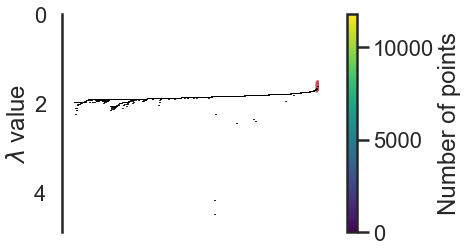

In [8]:
# clusterer.condensed_tree_.plot(select_clusters=True)

In [9]:
# g = clusterer.condensed_tree_.to_networkx()
# g.number_of_nodes()


13022

In [10]:
# clusterer.condensed_tree_.to_pandas().head()

,parent,child,lambda_val,child_size
0,11791,5789,1.359745,1
1,11791,7986,1.433397,1
2,11791,8699,1.458763,1
3,11791,613,1.460748,1
4,11791,5019,1.461480,1


In [12]:
# tree = clusterer.condensed_tree_.to_pandas()
# tree[tree.child_size > 1].head()

,parent,child,lambda_val,child_size
166,11791,11792,1.607527,11623
167,11791,11793,1.607527,2
715,11792,11794,1.660716,11074
716,11792,11795,1.660716,4
1071,11794,11796,1.677872,10721
